## Assumption
- Data is normally distributed

In a normal distribution, outliers are often identified based on how far data points are from the mean, typically using standard deviations.

In the context of a 99.8% confidence level, the remaining 0.2% of data (0.1% in each tail) would lie outside the range of ±3 standard deviations from the mean. These extreme data points are often considered outliers because they are far from the mean and occur with very low probability in a normal distribution.

To summarize:

Within ±3 standard deviations of the mean: 99.8% of data is expected.
Beyond ±3 standard deviations: The remaining 0.2% (i.e., 0.1% in each tail) is often considered as outliers due to their rarity in a normal distribution.

## Why named z-score
- xi - mean/ sd
- -3 to 3
- upper limit(3sd) and lower limit (-3sd)

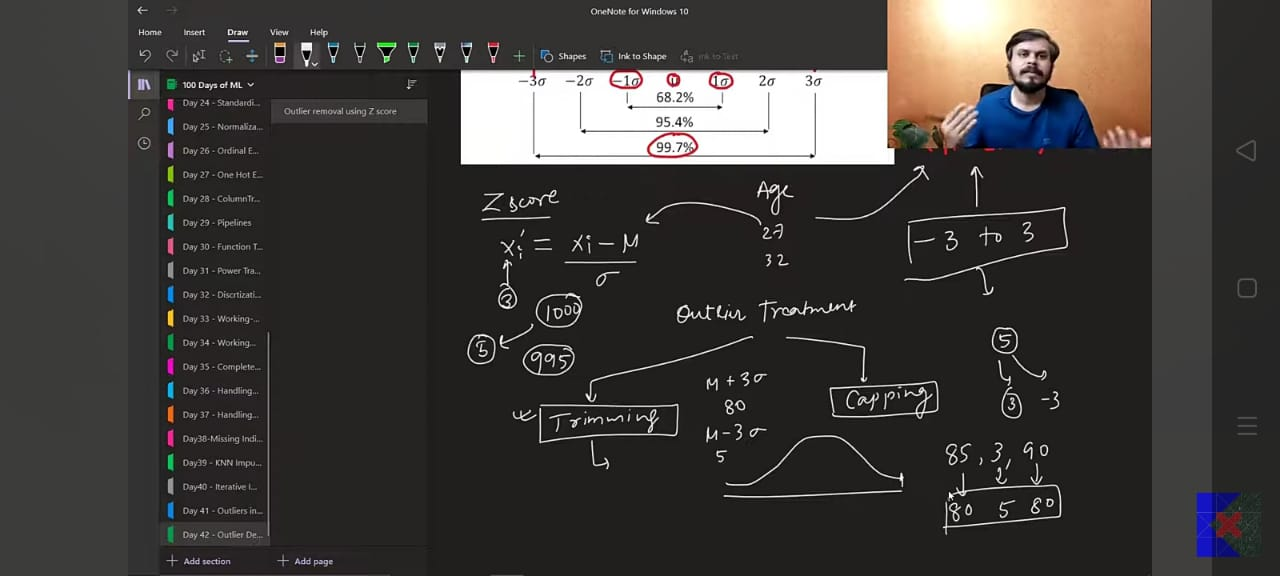

In [71]:
from PIL import Image
Image.open(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\WhatsApp Image 2024-11-03 at 16.04.26.jpeg")

In [72]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\placement_day42.csv")

In [73]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_8384\303490747.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_8384\303490747.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

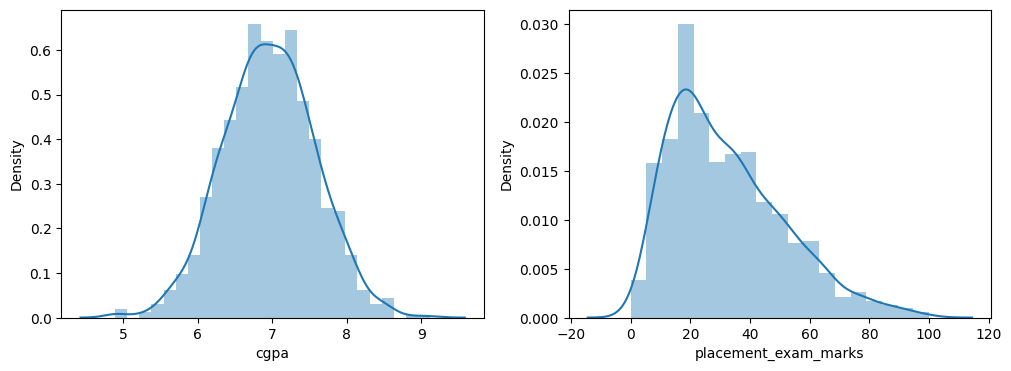

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['cgpa'])

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

In [75]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Sd value of cgpa",df['cgpa'].std())
print("min value of cgpa",df['cgpa'].min())
print("max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Sd value of cgpa 0.6158978751323896
min value of cgpa 4.89
max value of cgpa 9.12


In [76]:
## Findling boundry value
print('Highest allowed',df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed',df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [77]:
## Detect outlier
df[(df['cgpa']>8.8) | (df['cgpa']<5.11 )]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [78]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11 )]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [79]:
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean() )/ (df['cgpa'].std())

In [80]:
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [81]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [82]:
df[(df['cgpa_zscore']>3)| (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [83]:
new_df = df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3 )]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [84]:
upper_limit = df['cgpa'].mean() + 3* df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [85]:
upper_limit

8.808933625397168

In [86]:
lower_limit

5.113546374602832

In [87]:
import numpy as np
df['cgpa'] = np.where(
    df['cgpa']<lower_limit,
    lower_limit,
    np.where(
        df['cgpa']>upper_limit,
             upper_limit,
        df['cgpa']
    )
)

In [88]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

In [90]:
# df['cgpa'] = np.where(
#     df['cgpa']>upper_limit,
#     upper_limit,
#     np.where(
#         df['cgpa']<lower_limit,
#         lower_limit,s
#         df['cgpa']
#     )
# )